In [109]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , roc_auc_score , roc_curve
from pandas_profiling import ProfileReport

In [110]:
df = pd.read_csv("C:\c++\My codes\csv files\winequality-red.csv")

In [111]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [112]:
set(df.quality)

{3, 4, 5, 6, 7, 8}

In [113]:
# ProfileReport(df)

In [114]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [115]:
x = df.drop(columns='quality')

In [116]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [117]:
y = df.quality

In [118]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [119]:
x_train , x_test, y_train,y_test = train_test_split(x,y,test_size = .25,random_state = 30)

In [120]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1178,5.6,0.915,0.00,2.1,0.041,17.0,78.0,0.99346,3.68,0.73,11.4
1189,8.8,0.955,0.05,1.8,0.075,5.0,19.0,0.99616,3.30,0.44,9.6
161,7.6,0.680,0.02,1.3,0.072,9.0,20.0,0.99650,3.17,1.08,9.2
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.99690,3.21,0.69,9.3
961,7.1,0.560,0.14,1.6,0.078,7.0,18.0,0.99592,3.27,0.62,9.3
...,...,...,...,...,...,...,...,...,...,...,...
919,8.4,0.620,0.12,1.8,0.072,38.0,46.0,0.99504,3.38,0.89,11.8
1164,9.0,0.785,0.24,1.7,0.078,10.0,21.0,0.99692,3.29,0.67,10.0
500,7.8,0.520,0.25,1.9,0.081,14.0,38.0,0.99840,3.43,0.65,9.0
941,9.9,0.270,0.49,5.0,0.082,9.0,17.0,0.99484,3.19,0.52,12.5


In [121]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1147,10.0,0.410,0.45,6.20,0.071,6.0,14.0,0.99702,3.21,0.49,11.8
659,7.1,0.840,0.02,4.40,0.096,5.0,13.0,0.99700,3.41,0.57,11.0
871,6.9,0.560,0.03,1.50,0.086,36.0,46.0,0.99522,3.53,0.57,10.6
1333,9.1,0.775,0.22,2.20,0.079,12.0,48.0,0.99760,3.18,0.51,9.6
1411,6.4,0.470,0.40,2.40,0.071,8.0,19.0,0.99630,3.56,0.73,10.6
...,...,...,...,...,...,...,...,...,...,...,...
721,8.9,0.480,0.24,2.85,0.094,35.0,106.0,0.99820,3.10,0.53,9.2
490,9.3,0.775,0.27,2.80,0.078,24.0,56.0,0.99840,3.31,0.67,10.6
575,12.3,0.270,0.49,3.10,0.079,28.0,46.0,0.99930,3.20,0.80,10.2
1051,8.5,0.460,0.59,1.40,0.414,16.0,45.0,0.99702,3.03,1.34,9.2


In [122]:
dt_model = DecisionTreeClassifier()

In [123]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [124]:
import sklearn
import  matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline 

In [125]:
sklearn.__version__

'1.1.2'

[Text(0.5544124815556493, 0.9722222222222222, 'X[10] <= 10.35\ngini = 0.642\nsamples = 1199\nvalue = [8, 35, 512, 477, 153, 14]'),
 Text(0.32951820720910624, 0.9166666666666666, 'X[6] <= 95.5\ngini = 0.528\nsamples = 666\nvalue = [6, 20, 406, 209, 23, 2]'),
 Text(0.20878346332209105, 0.8611111111111112, 'X[9] <= 0.585\ngini = 0.554\nsamples = 584\nvalue = [6, 19, 332, 202, 23, 2]'),
 Text(0.08002213322091062, 0.8055555555555556, 'X[6] <= 90.5\ngini = 0.468\nsamples = 261\nvalue = [3, 14, 179, 63, 2, 0]'),
 Text(0.055596543001686344, 0.75, 'X[10] <= 9.075\ngini = 0.453\nsamples = 250\nvalue = [3, 14, 176, 55, 2, 0]'),
 Text(0.016863406408094434, 0.6944444444444444, 'X[6] <= 39.0\ngini = 0.604\nsamples = 15\nvalue = [0, 2, 6, 7, 0, 0]'),
 Text(0.006745362563237774, 0.6388888888888888, 'X[8] <= 3.38\ngini = 0.406\nsamples = 8\nvalue = [0, 1, 1, 6, 0, 0]'),
 Text(0.003372681281618887, 0.5833333333333334, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 0, 6, 0, 0]'),
 Text(0.01011804384485666, 0.5

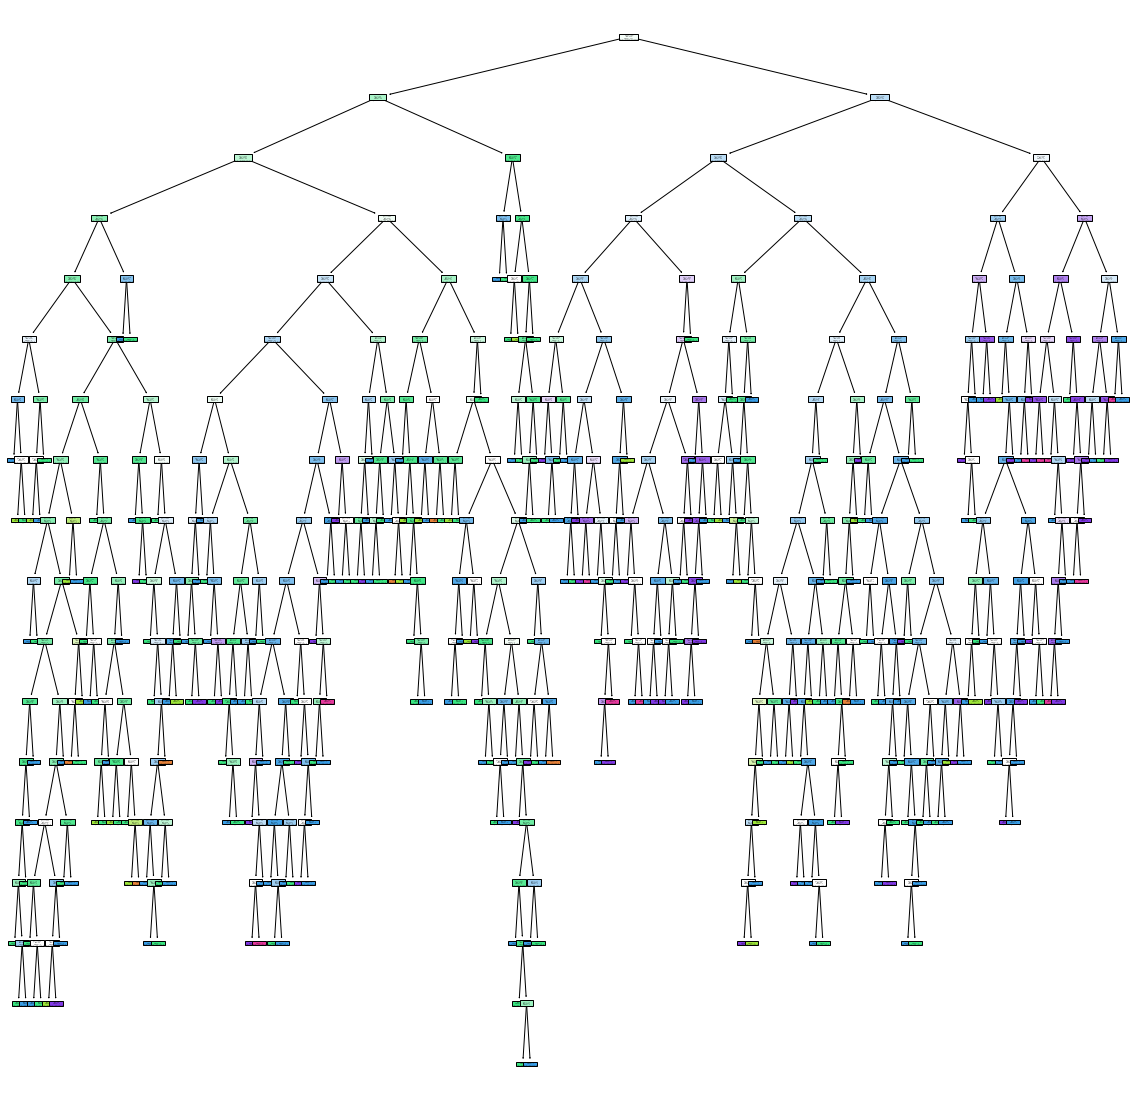

In [126]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model,filled=True)

In [127]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [128]:
df1 = df.head(500)

In [129]:
x1 = df1.drop(columns='quality')

In [130]:
y1 = df1.quality

In [131]:
dt_model1 = DecisionTreeClassifier()
dt_model1.fit(x1,y1)

DecisionTreeClassifier()

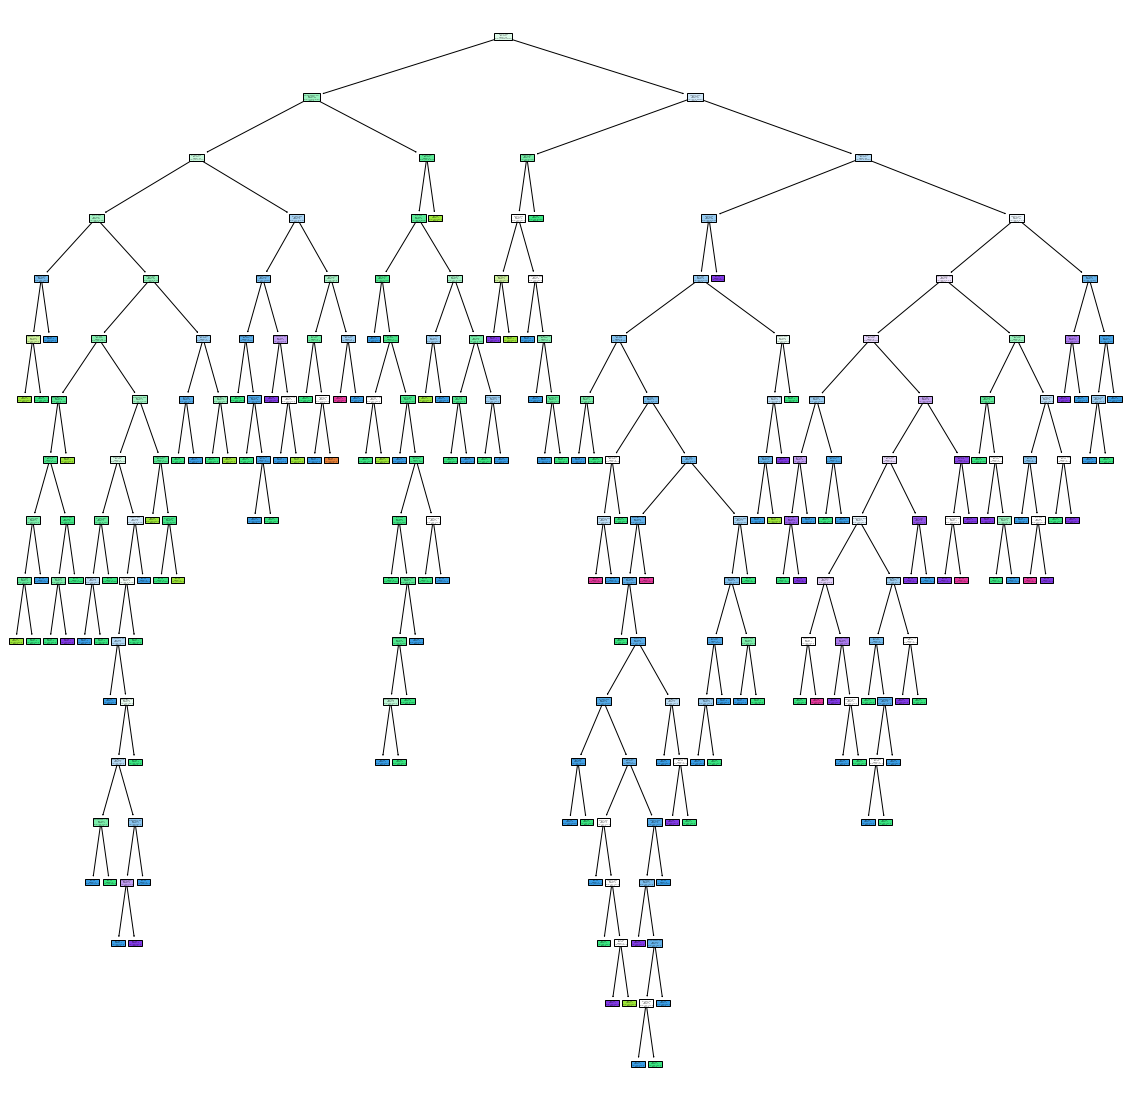

In [132]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model1,filled=True, class_names=[str(i) for i in set(y1)] ,feature_names=x1.columns)
plt.savefig('dt_model_1')

In [133]:
y1

0      5
1      5
2      5
3      6
4      5
      ..
495    8
496    6
497    5
498    8
499    6
Name: quality, Length: 500, dtype: int64

In [134]:
[str(i) for i in set(y1)]

['3', '4', '5', '6', '7', '8']

In [135]:
set(y1)

{3, 4, 5, 6, 7, 8}

In [136]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.9972,3.15,0.65,11.0,8
496,7.8,0.52,0.25,1.9,0.081,14.0,38.0,0.9984,3.43,0.65,9.0,6
497,7.2,0.34,0.32,2.5,0.090,43.0,113.0,0.9966,3.32,0.79,11.1,5
498,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.9972,3.15,0.65,11.0,8


In [137]:
dt_model1.predict(x1)

array([5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 7, 5, 4, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 7, 4, 5, 5, 4, 6, 5,
       5, 4, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 7, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 5, 4, 5, 5, 5, 6, 5, 4, 5, 5, 5, 5, 6, 5, 6, 5,
       5, 5, 5, 6, 5, 5, 4, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5,
       5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 4, 5, 5,
       5, 5, 5, 5, 5, 6, 5, 4, 6, 5, 5, 5, 5, 4, 6, 5, 4, 6, 6, 6, 5, 5,
       5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6,
       7, 4, 7, 5, 5, 5, 6, 7, 7, 5, 5, 7, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5,
       6, 5, 5, 6, 4, 6, 6, 5, 6, 5, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6,
       6, 7, 7, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 7, 5, 4, 5, 5,
       5, 7, 4, 8, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 8, 7, 6, 7, 5, 7, 5, 5,
       6, 6, 7, 5, 7, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6,

In [138]:
dt_model1.score(x1,y1)

1.0

In [139]:
dt_model1.score(x_test, y_test)

0.59

In [140]:
path = dt_model1.cost_complexity_pruning_path(x1,y1)
ccp_alpha = path.ccp_alphas

In [141]:
ccp_alpha

array([0.        , 0.00166667, 0.00175   , 0.00181818, 0.00184615,
       0.00186667, 0.00188235, 0.00192308, 0.002     , 0.002     ,
       0.002     , 0.002     , 0.002     , 0.002     , 0.002     ,
       0.002     , 0.002     , 0.00203333, 0.00247552, 0.00261111,
       0.00262769, 0.00266667, 0.00266667, 0.00266667, 0.00266667,
       0.00266667, 0.00266667, 0.00266667, 0.00266667, 0.00272222,
       0.00283333, 0.003     , 0.003     , 0.003     , 0.003     ,
       0.00304762, 0.00305051, 0.00308418, 0.00328205, 0.00333333,
       0.00333333, 0.00334032, 0.00336606, 0.00342857, 0.00343316,
       0.0035    , 0.0035    , 0.0036    , 0.00363636, 0.00373809,
       0.0038    , 0.0038237 , 0.004     , 0.00404444, 0.00428571,
       0.00437662, 0.00462338, 0.00465709, 0.00466667, 0.0048    ,
       0.00495726, 0.00504242, 0.00508235, 0.00509091, 0.00510606,
       0.00516667, 0.00568485, 0.00589394, 0.00656364, 0.00671079,
       0.0067591 , 0.00688352, 0.00688889, 0.007     , 0.00701

In [142]:
dt_modle2 = []
for ccp in ccp_alpha:
    dt_m  = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(x1,y1)
    dt_modle2.append(dt_m)

Text(0, 0.5, 'score')

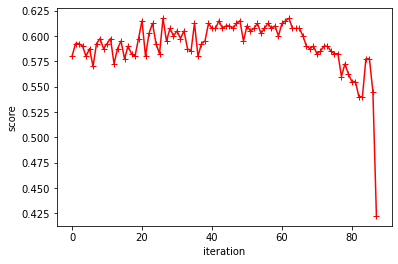

In [143]:
dt_model2 = []
score = []
for i in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha = i)
    dt_m.fit(x1,y1)
    dt_model2.append(dt_m)
    score.append(dt_m.score(x_test, y_test))

    
plt.plot(score, 'r-+')
plt.xlabel('iteration')
plt.ylabel('score')

In [144]:
dt_modle2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.0016666666666666668),
 DecisionTreeClassifier(ccp_alpha=0.00175),
 DecisionTreeClassifier(ccp_alpha=0.0018181818181818184),
 DecisionTreeClassifier(ccp_alpha=0.0018461538461538455),
 DecisionTreeClassifier(ccp_alpha=0.001866666666666667),
 DecisionTreeClassifier(ccp_alpha=0.001882352941176471),
 DecisionTreeClassifier(ccp_alpha=0.0019230769230769243),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002033333333333334),
 DecisionTreeClassifier(ccp_alpha=0.0024755244755244737),
 DecisionTreeClassifier(ccp_alpha=0.0026111111111111114),
 DecisionTreeClassifier(ccp_alph

In [145]:
train_score = [i.score(x1,y1) for i in dt_modle2]

In [146]:
test_score = [i.score(x_test ,y_test) for i in dt_modle2]

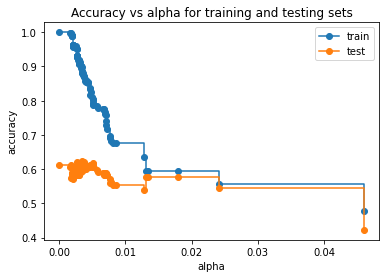

In [147]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alpha, train_score, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alpha, test_score, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [148]:
dt_model_ccp = DecisionTreeClassifier(random_state=0 , ccp_alpha=.014)
dt_model_ccp.fit(x1,y1)

DecisionTreeClassifier(ccp_alpha=0.014, random_state=0)

[Text(0.5, 0.8333333333333334, 'X[10] <= 9.85\ngini = 0.624\nsamples = 500\nvalue = [1, 16, 239, 184, 52, 8]'),
 Text(0.25, 0.5, 'X[6] <= 62.5\ngini = 0.504\nsamples = 259\nvalue = [1, 12, 167, 72, 6, 1]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.576\nsamples = 169\nvalue = [1, 9, 91, 61, 6, 1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.271\nsamples = 90\nvalue = [0, 3, 76, 11, 0, 0]'),
 Text(0.75, 0.5, 'X[9] <= 0.545\ngini = 0.657\nsamples = 241\nvalue = [0, 4, 72, 112, 46, 7]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.408\nsamples = 32\nvalue = [0, 2, 24, 5, 1, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.638\nsamples = 209\nvalue = [0, 2, 48, 107, 45, 7]')]

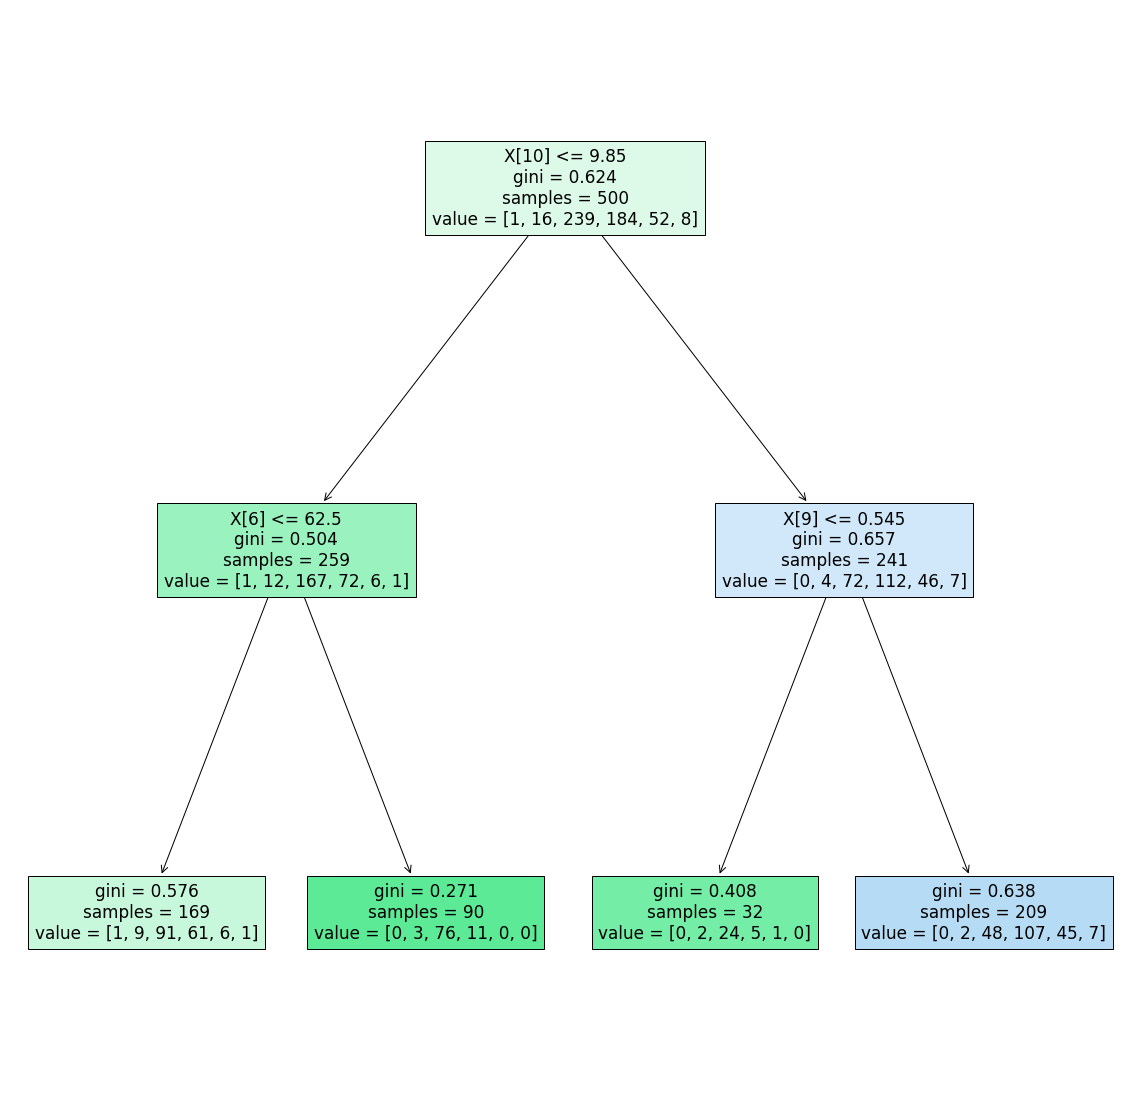

In [149]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model_ccp,filled=True)

In [150]:
dt_model_ccp.score(x1,y1)

0.596

In [151]:
dt_model_ccp.score(x_test,y_test)

0.5775

In [152]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [153]:
grid_pram = {"criterion":['gini','entropy'],
            "splitter":['best','random'],
            "max_depth" : range(2,40,1),
            "min_samples_split":range(2,10 ,1),
            "min_samples_leaf":range(1,10,1),
            'ccp_alpha':np.random.rand(20)
            }

In [154]:
grid_ccp = GridSearchCV(estimator=dt_model_ccp,param_grid=grid_pram , cv = 10 , n_jobs=-1)

In [155]:
# grid_ccp.fit(x1,y1)

In [156]:
grid_ccp.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
dt_cpp_new = DecisionTreeClassifier(criterion='entropy' , max_depth=17 ,min_samples_leaf=1 , min_samples_split=3 , splitter='random',ccp_alpha=0.014)

In [ ]:
dt_cpp_new.fit(x1,y1)

DecisionTreeClassifier(ccp_alpha=0.014, criterion='entropy', max_depth=17,
                       min_samples_split=3, splitter='random')

In [ ]:
dt_cpp_new.score(x1,y1)

0.66

In [ ]:
dt_cpp_new.score(x_test,y_test)

0.565

In [ ]:
pred = dt_cpp_new.predict(x_train)

In [ ]:
confusion_matrix(y_train,pred)

array([[  0,   0,   5,   3,   0,   0],
       [  0,   0,  20,  15,   0,   0],
       [  0,   0, 352, 150,  10,   0],
       [  0,   0, 162, 265,  50,   0],
       [  0,   0,  11,  87,  55,   0],
       [  0,   0,   0,  10,   4,   0]], dtype=int64)

In [ ]:
X = df.drop(columns='quality')

In [ ]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
y = df.quality

In [ ]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
x_train , x_test, y_train,y_test = train_test_split(X,y,random_state = 0)

In [ ]:
bag_dt = BaggingClassifier(DecisionTreeClassifier(),n_estimators=150)

In [ ]:
bag_dt.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=150)

In [ ]:
bag_dt.score(x_test,y_test)

0.6975

In [ ]:
bag_dt.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [ ]:
bag_dt.get_params()

{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = BaggingClassifier(KNeighborsClassifier(10),n_estimators=10)

In [ ]:
knn.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=10))

In [ ]:
knn.score(x_test,y_test)

0.53

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rnf = RandomForestClassifier()

In [ ]:
rnf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
rnf.score(x_test,y_test)

0.695

In [ ]:
rnf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rnf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1171805330),
 DecisionTreeClassifier(max_features='sqrt', random_state=680512822),
 DecisionTreeClassifier(max_features='sqrt', random_state=538281124),
 DecisionTreeClassifier(max_features='sqrt', random_state=2084000698),
 DecisionTreeClassifier(max_features='sqrt', random_state=723222031),
 DecisionTreeClassifier(max_features='sqrt', random_state=1943230118),
 DecisionTreeClassifier(max_features='sqrt', random_state=266834203),
 DecisionTreeClassifier(max_features='sqrt', random_state=1600511209),
 DecisionTreeClassifier(max_features='sqrt', random_state=163227490),
 DecisionTreeClassifier(max_features='sqrt', random_state=431937634),
 DecisionTreeClassifier(max_features='sqrt', random_state=939071574),
 DecisionTreeClassifier(max_features='sqrt', random_state=1754775983),
 DecisionTreeClassifier(max_features='sqrt', random_state=555391961),
 DecisionTreeClassifier(max_features='sqrt', random_state=1906823666),
 DecisionTreeC

In [ ]:
rnf.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1171805330)

[Text(0.49920609994416526, 0.975, 'X[10] <= 10.35\ngini = 0.645\nsamples = 752\nvalue = [13, 35, 522, 462, 152, 15]'),
 Text(0.25902079843662756, 0.925, 'X[10] <= 9.925\ngini = 0.508\nsamples = 414\nvalue = [7, 21, 418, 193, 19, 0]'),
 Text(0.1045854271356784, 0.875, 'X[10] <= 9.05\ngini = 0.459\nsamples = 318\nvalue = [4, 18, 353, 136, 4, 0]'),
 Text(0.00893355667225014, 0.825, 'X[7] <= 0.996\ngini = 0.549\nsamples = 19\nvalue = [0, 3, 12, 20, 0, 0]'),
 Text(0.00446677833612507, 0.775, 'gini = 0.0\nsamples = 1\nvalue = [0, 3, 0, 0, 0, 0]'),
 Text(0.01340033500837521, 0.775, 'X[6] <= 40.0\ngini = 0.469\nsamples = 18\nvalue = [0, 0, 12, 20, 0, 0]'),
 Text(0.00893355667225014, 0.725, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 0, 14, 0, 0]'),
 Text(0.01786711334450028, 0.725, 'X[4] <= 0.209\ngini = 0.444\nsamples = 9\nvalue = [0, 0, 12, 6, 0, 0]'),
 Text(0.01340033500837521, 0.675, 'X[6] <= 68.5\ngini = 0.142\nsamples = 7\nvalue = [0, 0, 12, 1, 0, 0]'),
 Text(0.00893355667225014, 0.625, 'X[

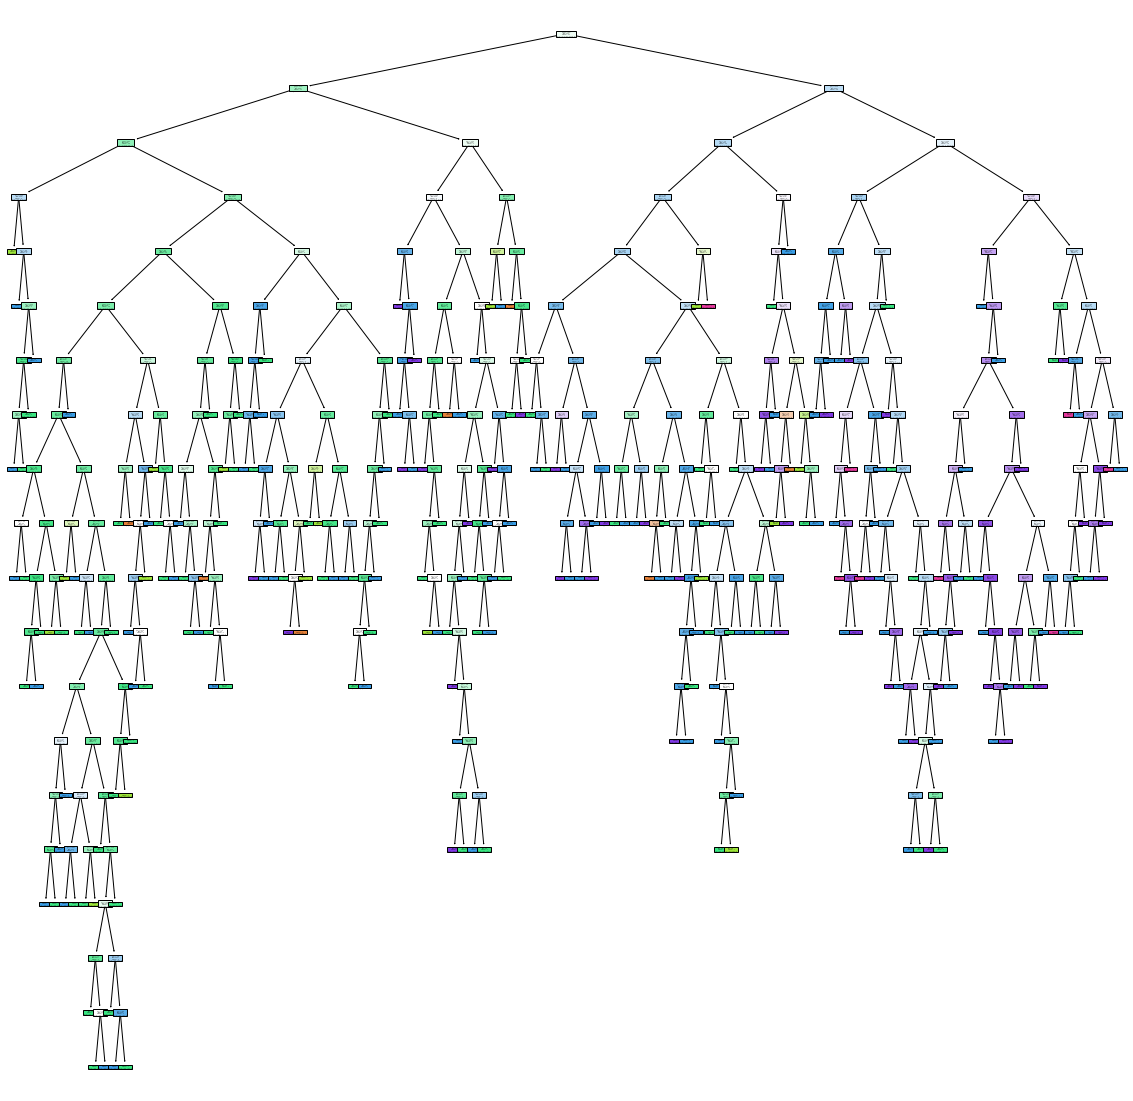

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
tree.plot_tree(rnf.estimators_[0],filled=True)

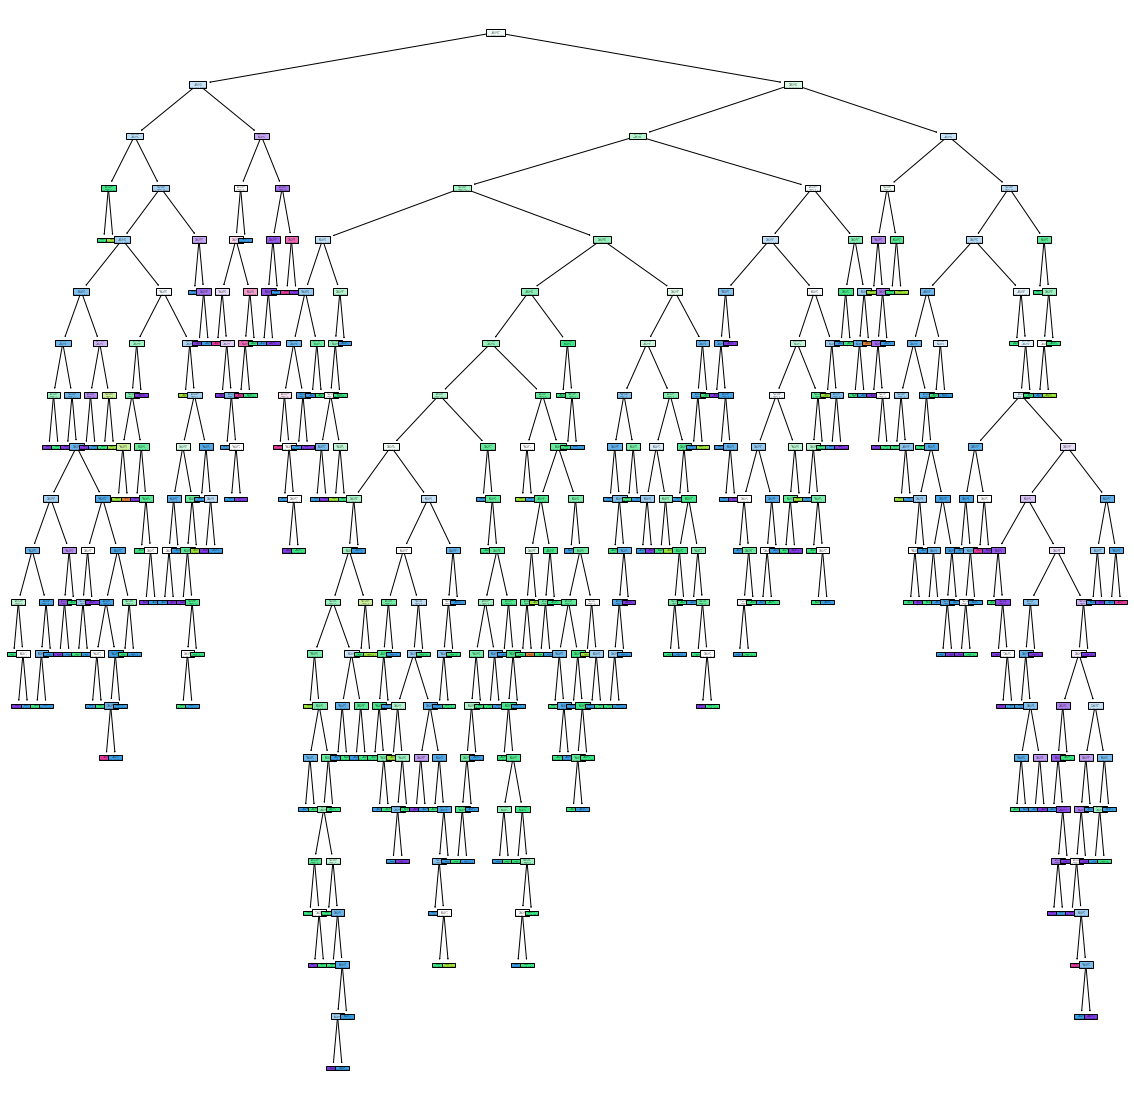

In [ ]:
plt.figure(figsize=(20,20))
for i in range(5) :
    tree.plot_tree(rnf.estimators_[i],filled = True)

In [ ]:
grid_pram = {
    'criterion': ['gini','entropy'],
    'max_depth': range(10),
    'min_samples_leaf': range(10),
    'n_estimators': [5,100,50,120,150],
}

In [ ]:
rf = RandomForestClassifier()

In [ ]:
grid_search_rf = GridSearchCV(estimator=rf,param_grid=grid_pram,cv=10)

In [ ]:
RF = RandomForestClassifier(criterion='entropy',max_depth=9,min_samples_leaf=1,n_estimators=120)

In [ ]:
RF.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=120)

In [ ]:
RF.score(x_test,y_test)

0.6825

In [157]:
data = df

In [158]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [159]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [160]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [161]:
x_train , x_test, y_train,y_test = train_test_split(X,y,random_state = 0)


In [181]:
knn1 = KNeighborsClassifier(6)

In [182]:
knn.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=10))

In [184]:
knn.score(x_test,y_test)

0.495

In [185]:
pram  = {
    'n_neighbors':[3,5,7,9,12,13,15,17,21]
}

In [186]:
grid_cv = GridSearchCV(knn1,param_grid=pram )

In [188]:
grid_cv.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=6),
             param_grid={'n_neighbors': [3, 5, 7, 9, 12, 13, 15, 17, 21]})

In [189]:
grid_cv.best_params_

{'n_neighbors': 12}

In [190]:
grid_cv.score(x_test,y_test)

0.52